# Chpater 1 and 2: Meet Hadoop and Map Reduce respectively

## 1. What is Hadoop ?

Apache Hadoop is an open source framework that is used to efficiently store and process large datasets ranging in size from gigabytes to petabytes of data. Instead of using one large computer to store and process the data, Hadoop allows clustering multiple computers to analyze massive datasets in parallel more quickly.

Link: https://aws.amazon.com/emr/details/hadoop/what-is-hadoop/

## 2. What is Hadoop consist of?

- Hadoop Distributed File System (HDFS) – A distributed file system that runs on standard or low-end hardware. HDFS provides better data throughput than traditional file systems, in addition to high fault tolerance and native support of large datasets.

- Yet Another Resource Negotiator (YARN) – Manages and monitors cluster nodes and resource usage. It schedules jobs and tasks.

- MapReduce – A framework that helps programs do the parallel computation on data. The map task takes input data and converts it into a dataset that can be computed in key value pairs. The output of the map task is consumed by reduce tasks to aggregate output and provide the desired result.

- Hadoop Common – Provides common Java libraries that can be used across all modules.

## 3. What is Map Reduce?

MapReduce is a programming model or pattern within the Hadoop framework that is used to access big data stored in the Hadoop File System (HDFS). It is a core component, integral to the functioning of the Hadoop framework.

MapReduce facilitates concurrent processing by splitting petabytes of data into smaller chunks, and processing them in parallel on Hadoop commodity servers. In the end, it aggregates all the data from multiple servers to return a consolidated output back to the application.

Link: https://www.talend.com/resources/what-is-mapreduce/

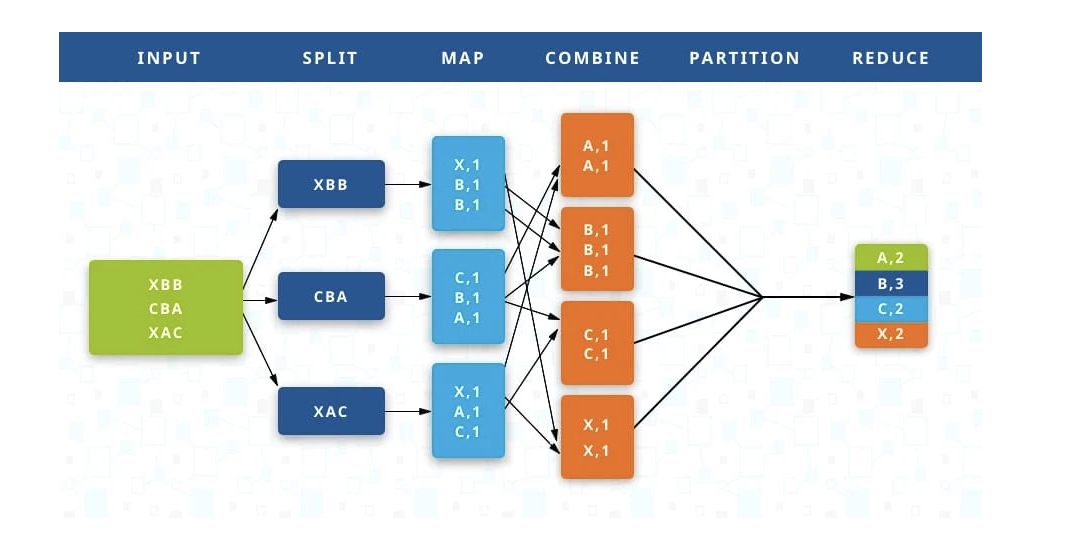

## 4. How Does Map reduce work?

The crux of MapReduce working are two functions: Map and Reduce. They are sequenced one after the other. We write these function according to our requoirment on data. They can be written in Java, Python or C++

1. The Map function takes input from the disk as <key,value> pairs, processes them, and produces another set of intermediate <key,value> pairs as output.

2. The Reduce function also takes inputs as <key,value> pairs, and produces <key,value> pairs as output.

## 5. What is HDFS (Hadoop Distribution File system)?

HDFS is a distributed file system that handles large data sets running on commodity hardware. It is used to scale a single Apache Hadoop cluster to hundreds (and even thousands) of nodes. 

Link: https://www.youtube.com/watch?v=4Gfl0WuONMY&ab_channel=InfoQ

## 6. What are the Types of Nodes in Hadoop?

#### 1. NameNode:

NameNode is the main and heartbeat node of Hdfs and also called master. It stores the meta data in RAM for quick access and track the files across hadoop cluster. If Namenode failure the whole hdfs is inaccessible so NameNode is very critical for HDFS. NameNode is the health of datanode and it access datanode data only. NameNode Tracking all information from files such as which file saved in cluster, access time of file and Which user access a file on current time.There are two types of NameNode

#### 2. Secondary NameNode:

Secondary NameNode helps to Primary NameNode and merge the namespaces. Secondary NameNode stores the data when NameNode failure and used to restart the NameNode. It requires huge amount of memory for data storing. Secondary NameNode runs on different machines for memory management. Secondary NameNode is checking point of NameNode.

#### 3. DataNode:

DataNode stores actual data of HDFS and also called Slave. If DataNode failure it does not affect any data which stored in DataNode. It Configured lot of disk space because DataNode stores actually data. It perform read and write operations as per client request. Performance of DataNode are based on NameNode Instuctions.

#### 4. Checkpoint Node:

Checkpoint Node mainly designed for solves the NameNode drawbacks. It tracks the latest checkpoint directory that has same structure. It creates the checking point for NameNode namespace and downloads the edits and fsimage from NameNode and mering locally. The new image are uploaded to NameNode. After this uploads the result to NameNode.

#### 5. Backup Node:

It provide the functions to Check Point but it interact with NameNode and it supports the online streaming of filesystems. In Backup Nodes namespace are available on main memory because it interact with primary node. It maintains up-to date file namespace for streaming process. Backup node having own memory so just save and copy the namespace from main memory.

#### 6. Job Tracker Node:

Job Tracker node used to MapReduce jobs and it process runs on separate node. It receives the request for MapReduce from client. It Loacte the data when after talking of NameNode. Job tracked choose best TaskTracker for executes the task and it give slots to tasktracker for execute the task. It monitors the all TaskTrackers and give status report to Client. If Job Tracked failure MapReduce function does not executed and all functions are halted so Job Tracker is critical for MapReduce.

#### 7. Task Tracker Node:

Task Tracker are runs on DataNode. TaskTrackers will be assigned Mapper and Reducer tasks to execute by JobTracker. If Task Tracker failure the job tracker assign the task for another node so MapReduce Task running successfully.

Link: https://www.techtutorial.in/types-of-nodes-in-hadoop/

## 7. What is Data Locality in Hadoop MapReduce?

Data locality in Hadoop is the process of moving the computation close to where the actual data resides instead of moving large data to computation. This minimizes overall network congestion. This also increases the overall throughput of the system.

The main drawback of Hadoop was cross-switch network traffic due to the huge amount of data. To overcome this drawback, Data Locality came into existence.

In Hadoop, HDFS stores datasets. Framework divides datasets into blocks and store across the datanodes. When a client runs the MapReduce job, then NameNode sent the MapReduce code to the datanodes on which data is available according to MapReduce job.

Link: https://techvidvan.com/tutorials/data-locality-in-hadoop-mapreduce/#:~:text=What%20is%20Data%20Locality%20in,overall%20throughput%20of%20the%20system.

## 8. At what part of parallel processing  data locatlioty  comes into picture?

Map Reduce is made of two functions: Map and Redcue. Data locating is used in Map task (Mapping) not in reduce task

Input to a single reduce task is normally the output from all mappers;
Output of the reduce is stored in HDFS for reliability.
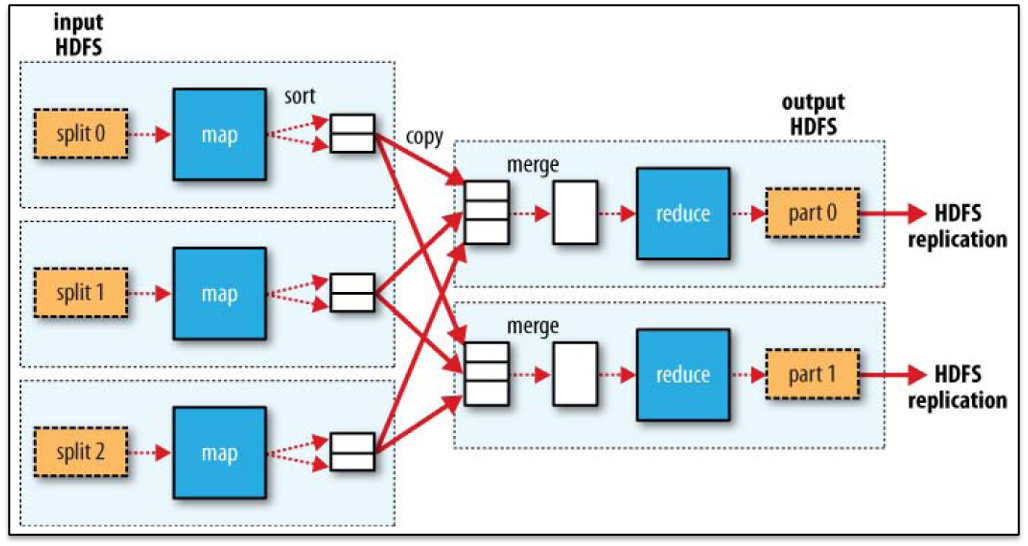

## 9. Why Data locality optimization is important?

Since Data locality is the main advantage of Hadoop MapReduce.  But this is not always beneficial in practice due to various reasons like Heterogeneous cluster, speculative execution, Data distribution and placement, and Data Layout.

In these cases we need to optimize our data storage patterns to strenghten data localty. We can use follwoing tehcniques

1. Keep the plit of block size constant for all the data nodes so that there is no diparity oin the map execution.
2. Check which datanode is taking more time and solve it

Note that optimizing data loicatily is quite time consuing process.

## 10. Where does the Output of Map taks go ?

Map tasks write their output to local disk (not to HDFS). Map output is intermediate output.Once the job is complete the map output can be thrown away. So storing it in HDFS with replication, would be overkill.


## 11. We know the number of Map task is decided by master node based on data nodes and data locality. How about number of reduce tasks?

- The number of reduce tasks is not governed by the size of the input, but is specified independently. 
When there are multiple reducers, the map tasks partition their output:one partition for each reduce task.

- The records for every key are all in a single partition. Partitioning can be controlled by a user-defined partitioning function.

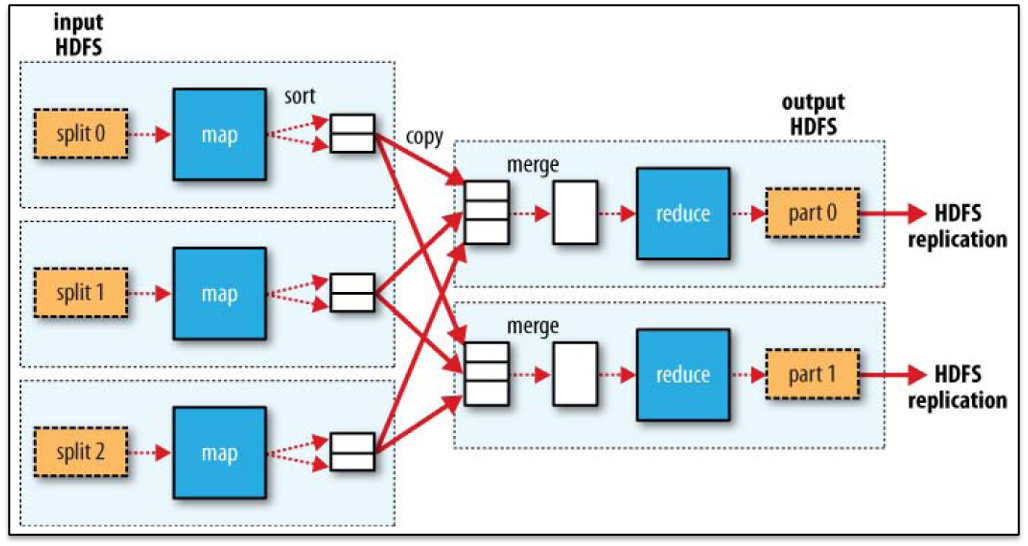

## 12. What is a combiner funtion?

- Combiner function Can be specified by users and is run on the map output.
- Forms the input to the reduce function.
- Minimizes the data transferred between map and reduce tasks.
- But Hadoop do not guarantee how many times it will call combiner function for a particular map output record.It is just optimization.
- The number of calling (even zero) does not affect the output of Reducers.

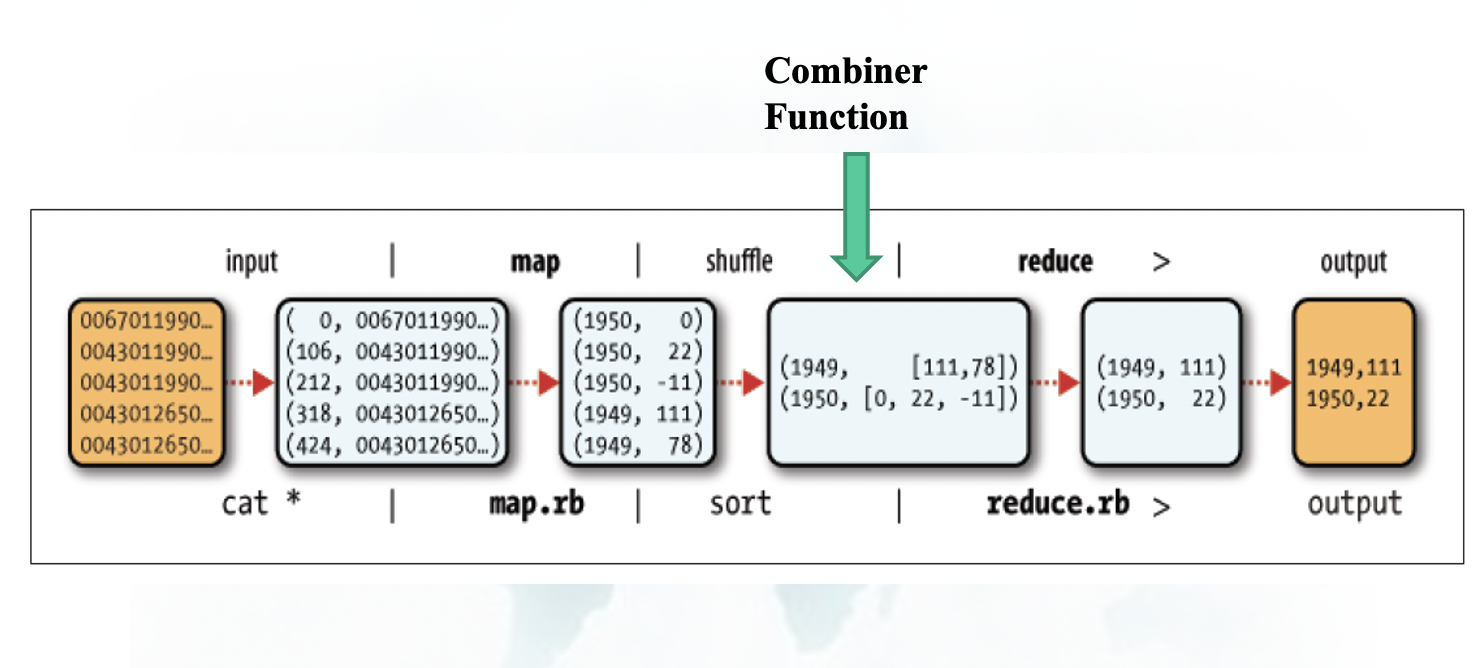
